
### 금리_단기1년전차이

```
'번지', '아파트명', '계약년월', '층', '건축년도', '도로명', '좌표X', '좌표Y', 'target',
       '금리_단기1년전차이', '평수', '동', '아파트ID', '아파트ID거리', '가까운공원ID', 'is_test',
       '학군'
       
28513
```

In [1]:
# visualization
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumBarunGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'AppleGothic'}) # 폰트 설정
plt.rc('font', family='AppleGothic')
import seaborn as sns

# utils
import pandas as pd
import numpy as np
from tqdm import tqdm
import pickle
import warnings;warnings.filterwarnings('ignore')

# Model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV
from dask.distributed import Client
from sklearn.model_selection import RandomizedSearchCV
import dask.dataframe as dd
# import eli5
# from eli5.sklearn import PermutationImportance

ImportError: dask.distributed is not installed.

Please either conda or pip install distributed:

  conda install dask distributed             # either conda install
  python -m pip install "dask[distributed]" --upgrade    # or pip install

In [2]:
# sys.path를 수정하여 모듈 경로를 설정
import sys
import os
import pandas as pd

# 프로젝트 루트 경로 추가
project_root = os.path.abspath("..")
sys.path.append(project_root)
# 모든 컬럼 출력 설정
# pd.set_option('display.max_columns', None)
# 모든 행 출력 설정
# pd.set_option('display.max_rows', None)

import module

In [3]:
df, df_test_y = module.file_load.load_current_version()

In [4]:
df['is_test'].value_counts()      # train과 test data가 하나로 합쳐진 것을 확인할 수 있습니다.

is_test
0    1097155
1       5607
Name: count, dtype: int64

In [7]:
# 결측치가 많거나 필요 없는 컬럼을 정리한다
drop_columns = [
    'index', '시군구',  '본번', '부번', 
      '해제사유발생일', '등기신청일자', '거래유형', '중개사소재지',
       'k-단지분류(아파트,주상복합등등)', 'k-전화번호', 'k-팩스번호', '단지소개기존clob', 'k-세대타입(분양형태)',
       'k-관리방식', 'k-복도유형', 'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)',
       'k-시행사', 'k-사용검사일-사용승인일', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적',
       'k-전용면적별세대현황(60㎡이하)', 'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하',
       'k-135㎡초과', 'k-홈페이지', 'k-등록일자', 'k-수정일자', '고용보험관리번호', '경비비관리형태',
       '세대전기계약방법', '청소비관리형태', '건축면적', '주차대수', '기타/의무/임대/임의=1/2/3/4', '단지승인일',
       '사용허가여부', '관리비 업로드','단지신청일', 
       'nearest_subway_distance', 'nearest_bus_distance', '1차역세권', '2차역세권',
       '1차버스정류장', '경과연도', '경과구분',  '층_그룹', '평수_그룹', '시',
        'nearest_park_distance',
    '가까운공원이름', 
        '공원생활권점수',
        '산책로갯수',
        '산책로총길이',
        '산책생활권점수',
        '생태문화길갯수',
        '생태문화길총길이',
        '생태문화생활권점수',
        '한강지천길갯수',
        '한강지천길총길이',
        '숲세권종합점수',
        '숲세권등급',
        '한강거리',
        '지가지수',
        '아파트전세_전기대비증감률',
        '실업률',
        '민간소비',
        '소비자심리지수',
        '경제심리지수',
        '여수신 금리차',
        '계약일',
        '전용면적(㎡)',
        '공원갯수',
        '공원총면적',
        '한강지천생활권점수'
]

# 전처리

In [8]:
df_select = module.preprocess.drop_columns(df, drop_columns)

In [9]:
df_select.columns

Index(['번지', '아파트명', '계약년월', '층', '건축년도', '도로명', '좌표X', '좌표Y', 'target',
       '금리_단기1년전차이', '평수', '구', '동', '아파트ID', '아파트ID거리', '가까운공원ID', 'is_test'],
      dtype='object')

In [10]:
# df_select = df_select[df_select['계약년월'] > 201701]
module.preprocess.번지_본번_부번_결측채우기(df_select)
# module.preprocess.한강거리_add(df_select)

# 파생변수

In [11]:
# module.preprocess.강남_add(df_select)

# module.preprocess.계약_건축년도_차이(df_select)
# module.preprocess.계약_건축년도_차이(df_select)
# module.preprocess.신축_add(df_select)
# # 강남 8학군 지역 설정
gangnam_8_schools = ['강남구', '서초구', '송파구']
# 학군 변수 추가: 강남 8학군이면 1, 아니면 0
df_select['학군'] = df_select['구'].apply(lambda x: 1 if x in gangnam_8_schools else 0)

# subway_df = module.file_load.load_지하철()
# df_select = module.preprocess.calculate_nearest_subway_distance(df_select, subway_df)

In [12]:
final_drop_columns = ['구']
df_select.drop(final_drop_columns, axis=1, inplace=True)

# Model Training

## 범주형 변수 Encoding

In [13]:
model_data = df_select.copy()
# model_data['한강거리'] = np.log1p(model_data['한강거리'])

In [14]:
model_data.columns

Index(['번지', '아파트명', '계약년월', '층', '건축년도', '도로명', '좌표X', '좌표Y', 'target',
       '금리_단기1년전차이', '평수', '동', '아파트ID', '아파트ID거리', '가까운공원ID', 'is_test',
       '학군'],
      dtype='object')

In [15]:
dt_train, dt_test = module.preprocess.split_train_test(model_data)
categorical_columns_v2 = module.preprocess.범주형_filter(dt_train)
label_encoders = module.preprocess.범주형_encoding(dt_train, dt_test, categorical_columns_v2)
print(dt_train.shape, dt_test.shape)

100%|██████████| 6/6 [00:01<00:00,  3.37it/s]

(1097155, 16) (5607, 16)


## Model Training


# 훈련데이터 분할

In [16]:
X_train, X_val, y_train, y_val = module.preprocess.holdout_split_X_y(dt_train)

In [17]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((877724, 15), (219431, 15), (877724,), (219431,))

In [18]:
X_train.head(1)

,번지,아파트명,계약년월,층,건축년도,도로명,좌표X,좌표Y,금리_단기1년전차이,평수,동,아파트ID,아파트ID거리,가까운공원ID,학군
586784,1444,3131,201605,11,1988,4922,127.015602,37.498732,-0.25,24,151,1404,18.501546,1612,1


In [ ]:
dt_test.drop(['target'], axis=1)
df_test_y

In [25]:
import lightgbm as lgb
import optuna
from sklearn.metrics import mean_squared_error
import module.preprocess  # 사용자 정의 모듈
import multiprocessing

# 시스템의 총 CPU 개수 확인
max_cpu_count = multiprocessing.cpu_count()
# 데이터 분리
# X_train, X_val, y_train, y_val = module.preprocess.holdout_split_X_y(dt_train)

X_val = dt_test.drop(['target'], axis=1)
y_val = df_test_y

print(max_cpu_count)
# Optuna 목적 함수 정의
def objective(trial):
    param = {
        "objective": "regression",
        "metric": "rmse",
        "boosting_type": trial.suggest_categorical("boosting_type", ["gbdt", "dart", "goss"]),
        "num_leaves": trial.suggest_int("num_leaves", 20, 300),
        "max_depth": trial.suggest_int("max_depth", 3, 15),
        "learning_rate": trial.suggest_loguniform("learning_rate", 1e-4, 1e-1),
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
        "subsample": trial.suggest_uniform("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_uniform("colsample_bytree", 0.5, 1.0),
        "reg_alpha": trial.suggest_loguniform("reg_alpha", 1e-4, 10),
        "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-4, 10),
    }

    # LightGBM 모델 학습
    model = lgb.LGBMRegressor(**param)
    model.fit(X_train, y_train, eval_set=[(X_val, y_val)], eval_metric="rmse", early_stopping_rounds=50, verbose=False)

    # 검증 데이터 RMSE 계산
    y_pred = model.predict(X_val)
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    return rmse

# Optuna 최적화 실행
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100, n_jobs=max_cpu_count)

# 최적 파라미터 출력
print("Best trial:")
trial = study.best_trial
print(f"  Value: {trial.value}")
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

# 최적 파라미터로 모델 학습 및 평가
best_params = trial.params
model = lgb.LGBMRegressor(**best_params)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
rmse = mean_squared_error(y_val, y_pred, squared=False)
print(f"Validation RMSE: {rmse}")


[I 2025-01-10 20:20:24,709] A new study created in memory with name: no-name-595dff65-fc82-411d-abe4-1becb79e79fc


4


[I 2025-01-10 20:21:37,078] Trial 3 finished with value: 82246.46991451495 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 271, 'max_depth': 6, 'learning_rate': 0.00044862827336911924, 'n_estimators': 288, 'min_child_samples': 13, 'subsample': 0.6863481162249334, 'colsample_bytree': 0.6119850549399901, 'reg_alpha': 0.12797443866943475, 'reg_lambda': 0.03850172836842458}. Best is trial 3 with value: 82246.46991451495.
[I 2025-01-10 20:21:46,789] Trial 1 finished with value: 31144.222469521057 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 197, 'max_depth': 5, 'learning_rate': 0.012472733332828903, 'n_estimators': 379, 'min_child_samples': 91, 'subsample': 0.7348364735082742, 'colsample_bytree': 0.6354264575666797, 'reg_alpha': 0.022812699094801416, 'reg_lambda': 0.2862436575539386}. Best is trial 1 with value: 31144.222469521057.
[I 2025-01-10 20:22:00,556] Trial 2 finished with value: 28948.182147384254 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 35, 'max_d

Best trial:
  Value: 22012.752039532104
  Params: 
    boosting_type: dart
    num_leaves: 258
    max_depth: 8
    learning_rate: 0.07224290084064122
    n_estimators: 301
    min_child_samples: 5
    subsample: 0.9773487107075421
    colsample_bytree: 0.9011817947068029
    reg_alpha: 0.04063525938772354
    reg_lambda: 0.0014482851327836004
Validation RMSE: 22012.752039531995


In [379]:
X_test = dt_test.drop(['target'], axis=1)

real_test_pred = model.predict(X_test)
print(f'RMSE test: {np.sqrt(metrics.mean_squared_error(df_test_y, real_test_pred))}')

RMSE test: 27833.624689672277


In [383]:
# Feature importance 계산 및 정렬
feature_importances = model.feature_importances_
features = X_train.columns

# Feature와 importance를 묶고, 중요도 기준으로 내림차순 정렬
sorted_features = sorted(zip(features, feature_importances), key=lambda x: x[1], reverse=True)

# 정렬된 결과 출력
for feature, importance in sorted_features:
    print(f'{feature}: {importance:.4f}')

번지: 0.0103
아파트명: 0.0077
계약년월: 0.1972
층: 0.0069
건축년도: 0.0726
도로명: 0.0113
좌표X: 0.0429
좌표Y: 0.0528
금리_단기1년전차이: 0.0034
평수: 0.3802
동: 0.0062
아파트ID: 0.0244
아파트ID거리: 0.0171
가까운공원ID: 0.0342
학군: 0.1328


In [362]:
X_test.shape, real_test_pred.shape, df_test_y.shape

((5607, 15), (5607,), (5607, 1))

In [363]:
# Squared_error를 계산하는 함수를 정의하겠습니다.
def calculate_se(target, pred):
    squared_errors = (target - pred) ** 2
    return squared_errors

In [364]:
X_val = X_test.reset_index(drop=True)
# real_test_pred.reset_index(drop=True)
X_val

,번지,아파트명,계약년월,층,건축년도,도로명,좌표X,좌표Y,금리_단기1년전차이,평수,동,아파트ID,아파트ID거리,가까운공원ID,학군
0,1678,327,202301,10,1983,4465,127.068028,37.487802,2.25,22,8,1200,0.000000,1661,1
1,1665,328,202212,3,1983,471,127.072682,37.489122,2.25,25,8,1199,45.380282,1731,1
2,1665,328,202301,10,1983,471,127.072682,37.489122,2.50,25,8,1199,45.380282,1731,1
3,728,1933,202210,7,2019,4978,127.064151,37.480049,1.75,18,8,250,117.916314,1691,1
4,728,1933,202212,8,2019,4978,127.064151,37.480049,2.25,25,8,250,117.916314,1691,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5602,3322,36,202207,4,2021,5352,126.891951,37.584794,1.25,25,163,181,0.000000,747,0
5603,3322,36,202207,6,2021,5352,126.891951,37.584794,1.25,25,163,181,0.000000,747,0
5604,3322,36,202207,7,2021,5352,126.891951,37.584794,1.25,25,163,181,0.000000,747,0
5605,3322,36,202209,4,2021,5352,126.891951,37.584794,1.75,25,163,181,0.000000,747,0


In [365]:
X_val['target'] = df_test_y
X_val['pred'] = real_test_pred
X_val['예측차이'] = X_val['target'] - X_val['pred']
# RMSE 계산
squared_errors = calculate_se(X_val['target'], X_val['pred'])
X_val['error'] = squared_errors
# Error가 큰 순서대로 sorting 해 보겠습니다.
X_val_sort = X_val.sort_values(by='error', ascending=False)       # 내림차순 sorting

In [366]:
X_val_sort_top100 = X_val.sort_values(by='error', ascending=False).head(100)        # 예측을 잘 하지못한 top 100개의 data
X_val_sort_tail100 = X_val.sort_values(by='error', ascending=False).tail(100)       # 예측을 잘한 top 100개의 data

In [367]:
# 해석을 위해 레이블인코딩 된 변수를 복원해줍니다.
error_top100 = X_val_sort_top100.copy()
for column in categorical_columns_v2 :     # 앞서 레이블 인코딩에서 정의했던 categorical_columns_v2 범주형 변수 리스트를 사용합니다.
    error_top100[column] = label_encoders[column].inverse_transform(X_val_sort_top100[column])

best_top100 = X_val_sort_tail100.copy()
for column in categorical_columns_v2 :     # 앞서 레이블 인코딩에서 정의했던 categorical_columns_v2 범주형 변수 리스트를 사용합니다.
    best_top100[column] = label_encoders[column].inverse_transform(X_val_sort_tail100[column])

In [368]:
error_top100.to_csv('optuna_lgbm_error_v7.csv', index=False)
best_top100.to_csv('optuna_lgbm_top_v7.csv', index=False)

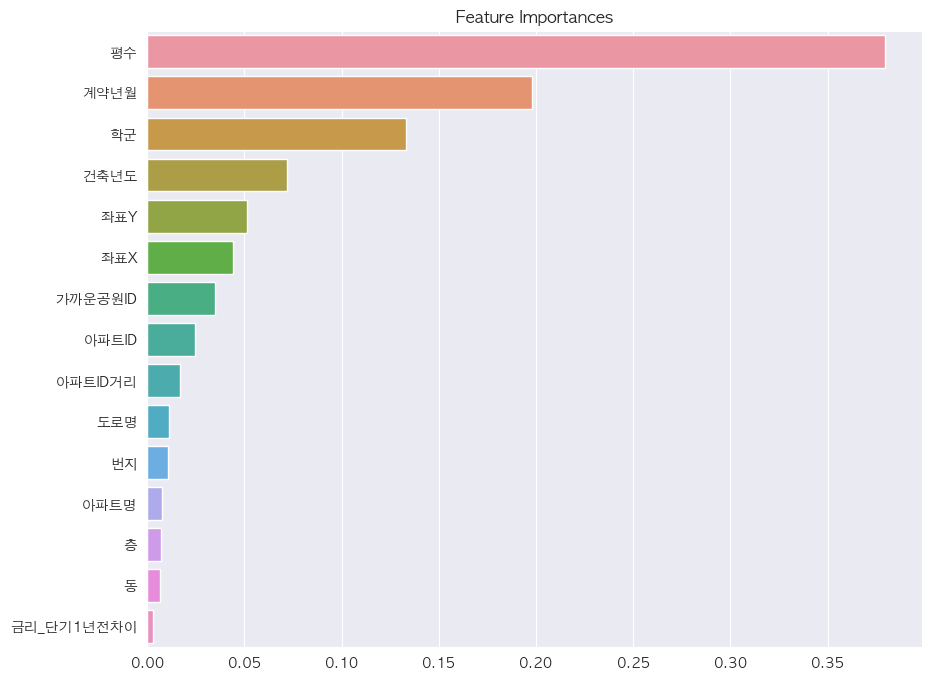

In [369]:
# 위 feature importance를 시각화해봅니다.
importances = pd.Series(model.feature_importances_, index=list(X_train.columns))
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(10,8))
plt.title("Feature Importances")
sns.barplot(x=importances, y=importances.index)
plt.show()

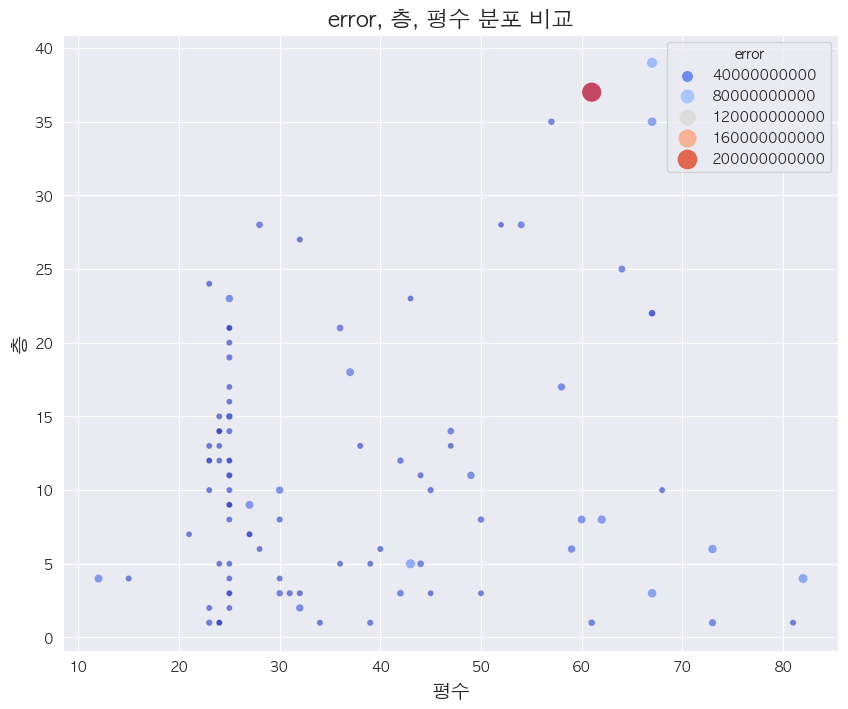

In [370]:
# 2D 히트맵으로 target, 층, 전용면적의 분포 비교
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=error_top100, 
    x='평수', 
    y='층', 
    size='error', 
    hue='error', 
    palette='coolwarm', 
    alpha=0.7, 
    sizes=(20, 200)
)
plt.title('error, 층, 평수 분포 비교', fontsize=16)
plt.xlabel('평수', fontsize=14)
plt.ylabel('층', fontsize=14)
plt.legend(title='error')
plt.grid(True)
plt.show()

In [371]:
print(error_top100['층'].value_counts().sort_values(ascending=False))
print(error_top100['평수'].value_counts())

층
1     9
3     9
5     6
12    6
4     5
14    5
8     5
21    5
10    5
11    4
13    4
9     4
6     4
2     3
15    3
7     3
28    3
23    2
17    2
22    2
35    2
24    1
20    1
27    1
37    1
19    1
25    1
39    1
18    1
16    1
Name: count, dtype: int64
평수
25    26
24    10
23     7
67     5
30     4
27     3
32     3
61     2
45     2
39     2
50     2
44     2
28     2
47     2
36     2
42     2
43     2
73     2
54     1
82     1
21     1
68     1
38     1
81     1
34     1
40     1
15     1
31     1
64     1
62     1
12     1
57     1
37     1
60     1
59     1
49     1
58     1
52     1
Name: count, dtype: int64


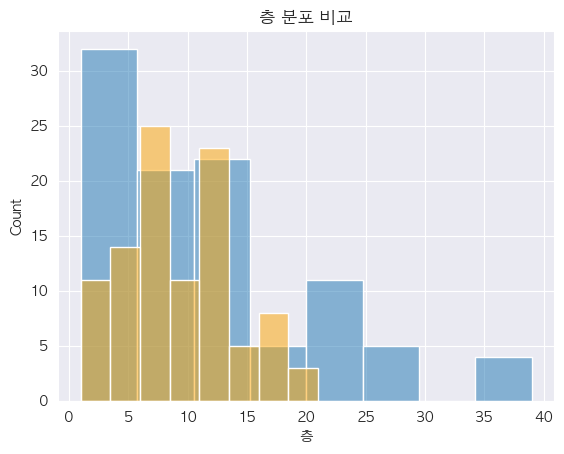

In [372]:
sns.histplot(data = error_top100, x='층', alpha=0.5)
sns.histplot(data = best_top100, x='층', color='orange', alpha=0.5)
plt.title('층 분포 비교')
plt.show()

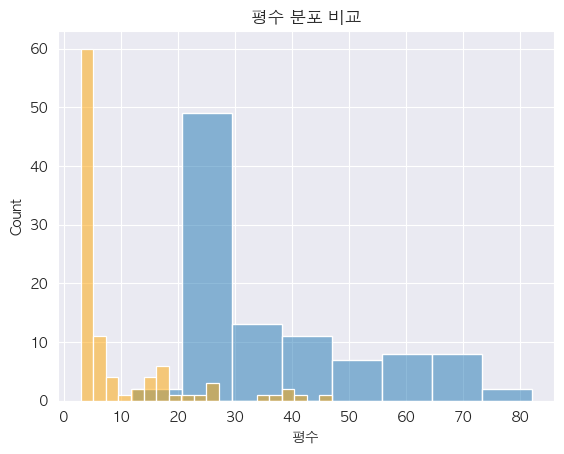

In [373]:
sns.histplot(data = error_top100, x='평수', alpha=0.5)
sns.histplot(data = best_top100, x='평수', color='orange', alpha=0.5)
plt.title('평수 분포 비교')
plt.show()

In [374]:
error_top100

,번지,아파트명,계약년월,층,건축년도,도로명,좌표X,좌표Y,금리_단기1년전차이,평수,동,아파트ID,아파트ID거리,가까운공원ID,학군,target,pred,예측차이,error
3420,501,상봉듀오트리스,202301,37,2016,상봉로 131,127.092204,37.597362,2.25,61,상봉동,A10027670,0.003000,P00566,0,185000.0,666000.0,-481000.0,2.313610e+11
4534,490,메세나폴리스,202209,39,2012,양화로 45,126.913938,37.551322,1.75,67,서교동,A12174601,0.000000,P01499,0,510000.0,745600.0,-235600.0,5.550736e+10
3650,510-11,강남상가,202208,5,1974,압구정로2길 46,127.020669,37.518772,1.75,43,신사동,A10024029,170.244626,P02521,1,129500.0,334800.0,-205300.0,4.214809e+10
2201,1496-24,트라움하우스3,202212,4,2002,명달로 97-14,127.002921,37.486202,2.25,82,서초동,A13784102,391.153802,P02373,1,640000.0,441000.0,199000.0,3.960100e+10
5035,43-4,롯데캐슬아이비,202207,35,2005,국제금융로 86,126.931761,37.520210,1.25,67,여의도동,A15088915,0.000000,P02024,0,420000.0,232800.0,187200.0,3.504384e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2718,17,파크리오,202210,23,2008,올림픽로 435,127.106151,37.520537,1.75,43,신천동,A13824006,325.014421,P02701,1,250000.0,324800.0,-74800.0,5.595040e+09
2153,1682,서초래미안,202212,12,2003,서초대로65길 13-10,127.018897,37.498558,2.25,25,서초동,A13788208,0.000000,P02428,1,186000.0,260600.0,-74600.0,5.565160e+09
30,888,대치아이파크,202301,3,2008,선릉로 222,127.054583,37.494984,2.25,45,대치동,A13528102,0.000000,P02534,1,370000.0,443800.0,-73800.0,5.446440e+09
4667,458-6,에덴지우,202208,7,2011,동교로17길 45,126.914821,37.556848,1.75,21,서교동,A12184201,202.061776,P01489,0,64500.0,138060.0,-73560.0,5.411074e+09


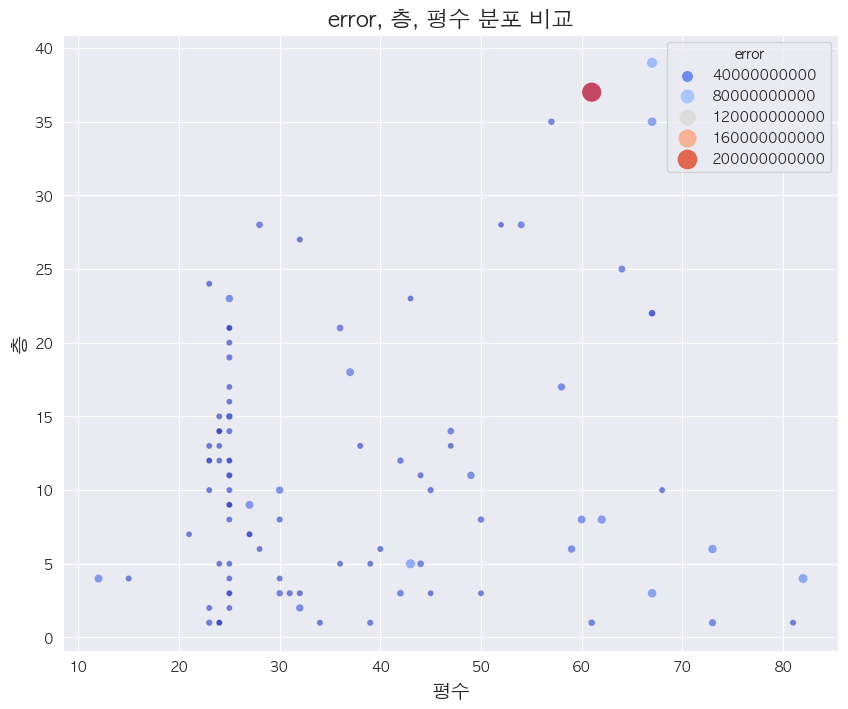

In [375]:
# 2D 히트맵으로 target, 층, 전용면적의 분포 비교
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=error_top100, 
    x='평수', 
    y='층', 
    size='error', 
    hue='error', 
    palette='coolwarm', 
    alpha=0.7, 
    sizes=(20, 200)
)
plt.title('error, 층, 평수 분포 비교', fontsize=16)
plt.xlabel('평수', fontsize=14)
plt.ylabel('층', fontsize=14)
plt.legend(title='error')
plt.grid(True)
plt.show()

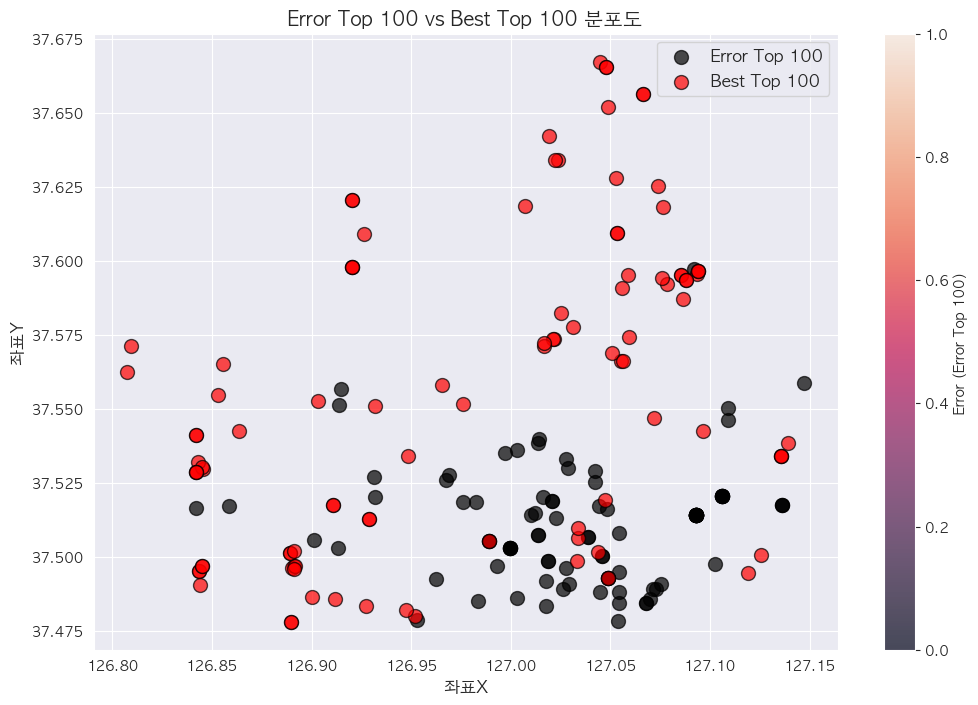

In [376]:

# 그래프 생성
plt.figure(figsize=(12, 8))

# error_top100 산점도
scatter1 = plt.scatter(
    error_top100['좌표X'], error_top100['좌표Y'], 
    c='black',  s=100, edgecolor='k', alpha=0.7, label='Error Top 100'
)

# best_top100 산점도
scatter2 = plt.scatter(
    best_top100['좌표X'], best_top100['좌표Y'], 
    c='red', s=100, edgecolor='k', alpha=0.7, label='Best Top 100'
)

# 컬러바 추가 (error_top100용)
plt.colorbar(scatter1, label='Error (Error Top 100)')

# 축 및 제목 설정
plt.xlabel('좌표X', fontsize=12)
plt.ylabel('좌표Y', fontsize=12)
plt.title('Error Top 100 vs Best Top 100 분포도', fontsize=14)
plt.grid(True)

# 범례 추가
plt.legend(fontsize=12)

# 그래프 표시
plt.show()

In [377]:
error_top100['구'].value_counts()

KeyError: '구'

In [95]:
error_top100[error_top100['예측차이'] > 100000].value_counts()

번지       아파트명         계약년월    층   건축년도  도로명            좌표X         좌표Y        평수  구     동      가까운공원ID  아파트_unique_key                 클러스터  학군  target    pred      예측차이      error       
1-44     힐탑트레져1동      202301  3   2003  유엔빌리지길 200-16  127.013718  37.538466  67  용산구   한남동    P00198   용산구_한남동_1-44_힐탑트레져1동_2003      9     0   430000.0  278200.0  151800.0  2.304324e+10    1
1496-24  트라움하우스3      202212  4   2002  명달로 97-14      127.002921  37.486202  82  서초구   서초동    P02373   서초구_서초동_1496-24_트라움하우스3_2002   15    1   640000.0  256800.0  383200.0  1.468422e+11    1
189      개포주공4단지      202301  4   1982  삼성로 14         127.069985  37.485699  12  강남구   개포동    P02509   강남구_개포동_189_개포주공4단지_1982       17    1   370000.0  196400.0  173600.0  3.013696e+10    1
193-1    힐데스하임빌라      202207  6   1998  남부순환로377길 26   127.045027  37.488125  73  강남구   도곡동    P02556   강남구_도곡동_193-1_힐데스하임빌라_1998     6     1   500000.0  346400.0  153600.0  2.359296e+10    1
21-1     서울           202207  8   1976  

In [96]:
error_top100.columns

Index(['번지', '아파트명', '계약년월', '층', '건축년도', '도로명', '좌표X', '좌표Y', '평수', '구', '동',
       '가까운공원ID', '아파트_unique_key', '클러스터', '학군', 'target', 'pred', '예측차이',
       'error'],
      dtype='object')